In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
prima_data = pd.read_csv('pima-indians-diabetes.csv')
prima_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
x = prima_data.drop('Outcome', axis=1)
y = prima_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

kfold = KFold(n_splits=50, shuffle=True, random_state=7)
log_reg = LogisticRegression()
results = cross_val_score(log_reg, x, y, cv=kfold, scoring='roc_auc')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.80952381 0.74358974 0.96875    0.96666667 0.98412698 0.58333333
 0.92727273 0.85454545 0.73015873 0.71428571 0.93333333 0.69230769
 0.76363636 0.93333333 0.65454545 0.93333333 0.94871795 0.9375
 0.66       0.83333333 0.82       0.75925926 0.92592593 0.86
 0.92       0.79545455 0.92307692 0.93181818 0.85185185 0.83928571
 0.51785714 0.76785714 0.90740741 0.88888889 0.77777778 0.91071429
 0.96296296 1.         0.85714286 1.         0.65384615 1.
 0.75       1.         0.53846154 0.875      0.73214286 0.92
 0.72       0.78571429]
Accuracy: 83.529% (12.308%)


In [27]:
n_iterations = 100
n_size = int(len(prima_data)/2)

stats = []

for i in range(n_iterations):
    train = resample(prima_data.values, n_samples=n_size)
    test = np.array([val for val in prima_data.values if val.tolist() not in train.tolist() ])
    dtree = DecisionTreeClassifier()
    x = train[:,:-1]
    y = train[:, -1]
    dtree.fit(x,y)
    predict = dtree.predict(test[:,:-1])
    score = round(accuracy_score(test[:,-1], predict),2)
#     print(score)
    stats.append(score)

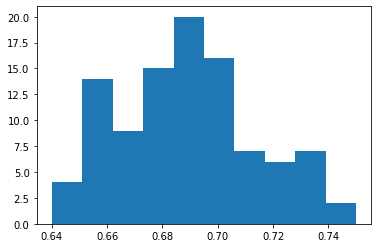

95.0 confidence interval 65.0% and 73.0%


In [28]:
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Leave One Out Cross Validation

In [3]:
data = np.array([10,20,30,40,50,60,70,80,90,100])

leave_one_out = LeaveOneOut()
for train, test in leave_one_out.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [ 20  30  40  50  60  70  80  90 100], test: [10]
train: [ 10  30  40  50  60  70  80  90 100], test: [20]
train: [ 10  20  40  50  60  70  80  90 100], test: [30]
train: [ 10  20  30  50  60  70  80  90 100], test: [40]
train: [ 10  20  30  40  60  70  80  90 100], test: [50]
train: [ 10  20  30  40  50  70  80  90 100], test: [60]
train: [ 10  20  30  40  50  60  80  90 100], test: [70]
train: [ 10  20  30  40  50  60  70  90 100], test: [80]
train: [ 10  20  30  40  50  60  70  80 100], test: [90]
train: [10 20 30 40 50 60 70 80 90], test: [100]
